In [81]:
#My First Machine Learning project

#Solving classification problem using Iris Dataset

#Supervised Learning(Class Label given in the dataset)

#The problem set has three flowers to classify with 4 attributes

#Total data present : 150 rows with classified values

#The goal of the problem is to identify the flower type based on the attribute values given

#How to achieve the goal?

#Using several Machine Learning Algorithms and selecting the one with the highest accuracy.

#System Level Library
import sys
print("Sys Version:"+sys.version)

#Library to perform scientific computations
import scipy
print("SciPy Version:"+scipy.__version__)

#Library for plotting graphs (For Visualization)
import matplotlib
print("MatPlotLib Version:"+matplotlib.__version__)

#Library for array/vector operations 
import numpy 
print("Numpy Version:"+numpy.__version__)

#Library for analyzing tabular data
import pandas
print("Pandas Version:"+pandas.__version__)

#Library for Machine learning Algorithm
import sklearn
print("SkLearn Version:"+sklearn.__version__)


Sys Version:3.7.0 (default, Jun 28 2018, 07:39:16) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
SciPy Version:1.1.0
MatPlotLib Version:2.2.3
Numpy Version:1.15.1
Pandas Version:0.23.4
SkLearn Version:0.19.2


In [82]:
#Importing Necessary Libraries which will be used

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt

from sklearn import model_selection

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

In [83]:
#Loading the dataset consisting of 150 rows and 4 attributes

#Iris dataset url
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

#Defining header for the dataset(last attribute is the class variable)
colname = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

#Using pandas to read the file
iris = pandas.read_csv(url, names = colname)

In [84]:
#Analyze the structure of the dataset

print('Total entries:'+str(iris.size))

print('Dimension:'+str(iris.ndim))

print('Shape:'+str(iris.shape))

#Let's take a look at the dataset 

#Prints first 10 entries
print(iris.head(10))

#Get the count of number of entries for each flower
iris.groupby('class').size()
#Here we see that the dataset is equally divided, there are 50 entries for each flower

Total entries:750
Dimension:2
Shape:(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2708e240>,
      dtype=object)

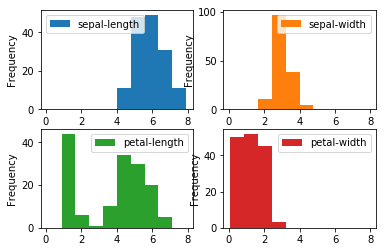

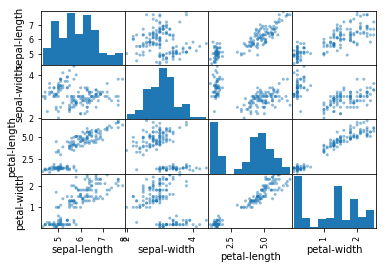

In [85]:
#Visualise the dataset by plotting univariate and multivariate plots

#Plotting histogram for each variable
iris.plot(kind = 'hist', subplots = True, layout = (2,2), sharex = False, sharey = False)

#Plotting pair-wise scatter plots to get relationship between each variables
#Using pandas library scatter_matrix
scatter_matrix(iris)
#We see that there is high corelation among some attributes.
#Let's take a look at petal-length vs petal-width plots. There is almost a linear relationship among these variables.
#Scatter plot is useful to know the relationship among each feature attributes.

In [86]:
#Split the dataset to training and test data
#Sampling the data

full_data = iris.values

#Get values for all entries of features
X = full_data[:,0:4]

#Get values for all class for all rows
Y = full_data[:,4]

#Using the train_test_split() to create both training and test data.
#Training data is used to create the model
#Test data is used for validation of the model which was created using training data

#Let's split the full_data in 80-20, where 80% is training data & test_data as 20%
test_data_size = 0.20

train_test_list = model_selection.train_test_split(X, Y, test_size = test_data_size, random_state = 10)

X_train_data = train_test_list[0]

X_test_data = train_test_list[1]

Y_train_data = train_test_list[2]

Y_test_data = train_test_list[3]

#Let's print the training and test data
print('X training data:'+ str(X_train_data))

print('X test data:'+ str(X_test_data))

print('Y training data:'+ str(Y_train_data))

print('Y test data:'+ str(Y_test_data))

#We now have X_train_data & Y_train_data to create the model.

X training data:[[6.6 2.9 4.6 1.3]
 [6.2 2.9 4.3 1.3]
 [7.2 3.0 5.8 1.6]
 [5.8 2.8 5.1 2.4]
 [6.3 2.5 5.0 1.9]
 [4.6 3.2 1.4 0.2]
 [6.7 3.3 5.7 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 2.6 6.9 2.3]
 [6.9 3.1 5.1 2.3]
 [5.0 3.4 1.6 0.4]
 [5.0 3.5 1.6 0.6]
 [5.2 2.7 3.9 1.4]
 [4.5 2.3 1.3 0.3]
 [6.3 3.3 4.7 1.6]
 [5.2 4.1 1.5 0.1]
 [6.9 3.1 4.9 1.5]
 [5.9 3.2 4.8 1.8]
 [5.6 2.8 4.9 2.0]
 [6.7 3.3 5.7 2.5]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.5 2.4 3.7 1.0]
 [6.0 2.9 4.5 1.5]
 [6.4 3.2 4.5 1.5]
 [5.8 4.0 1.2 0.2]
 [5.3 3.7 1.5 0.2]
 [6.1 2.9 4.7 1.4]
 [5.4 3.4 1.7 0.2]
 [6.4 3.1 5.5 1.8]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [4.9 2.5 4.5 1.7]
 [5.1 2.5 3.0 1.1]
 [6.7 3.1 5.6 2.4]
 [4.9 3.1 1.5 0.1]
 [6.9 3.1 5.4 2.1]
 [4.8 3.0 1.4 0.3]
 [5.8 2.7 3.9 1.2]
 [6.0 2.7 5.1 1.6]
 [4.4 3.2 1.3 0.2]
 [6.8 3.2 5.9 2.3]
 [7.9 3.8 6.4 2.0]
 [6.5 3.0 5.5 1.8]
 [7.6 3.0 6.6 2.1]
 [6.3 2.8 5.1 1.5]
 [4.6 3.4 1.4 0.3]
 [5.7 2.6 3.5 1.0]
 [6.7 2.5 5.8 1.8]
 [5.7 2.8 4.1 1.3]
 [4.9 3.1 1.5 0.1]
 [6.4 2.8 5.6 2

In [87]:
#Perform Re-Sampling of the Training Data using K-fold Cross Validation 
#K-fold cross validation is much better than LOOCV and Validation set approach.

#Let's take K as 10, the training data will be split in 1 & K-1 folds i.e. 1 & 9 folds.
#The model is constructed using 9 folds of data and then predict class variable using 1 fold. 
kfold = model_selection.KFold(n_splits = 10)

#To construct the model, let's use the Logistic Regression algorithm to measure it's accuracy.
model_lr = LogisticRegression()
result_lr = model_selection.cross_val_score(model_lr, X_train_data, Y_train_data, cv = kfold, scoring = 'accuracy')

print('Accuracy using Logistic Regression:'+ str(result_lr.mean()))

Accuracy using Logistic Regression:0.9416666666666667


In [74]:
#We have seen the accuracy of our model using Logistic Regression
#Let's measure the accuracy of the model using K-Nearest Neighbors

model_knn = KNeighborsClassifier()
result_knn = model_selection.cross_val_score(model_knn, X_train_data, Y_train_data, cv = kfold, scoring = 'accuracy')

print('Accuracy using KNN:'+ str(result_knn.mean()))

Accuracy using KNN:0.9583333333333334


In [75]:
#Let's measure the accuracy of the model using Naive Baye's

model_nb = GaussianNB()
result_nb = model_selection.cross_val_score(model_nb, X_train_data, Y_train_data, cv = kfold, scoring = 'accuracy')

print('Accuracy using Navie Bayes:'+ str(result_nb.mean()))

Accuracy using Navie Bayes:0.925


In [78]:
#Let's measure the accuracy of the model using Support Vector Machines

model_svm = SVC()
result_svm = model_selection.cross_val_score(model_svm, X_train_data, Y_train_data, cv = kfold, scoring = 'accuracy')

print('Accuracy using Support Vector Machine:'+ str(result_svm.mean()))

Accuracy using Support Vector Machine:0.975


In [ ]:
#We see that we get the highest accuracy using Support Vector Machine.

#We have analyzed the following algorithms to predict the accuracy:

#1. Logistic Regression
#2. K-Nearest Neighbor
#3. Naive Bayes
#4. Support Vector Machines

In [80]:
#Now let's construct the model using SVM and make the prediction.

#Fit the model using training data
model_svm.fit(X_train_data, Y_train_data)
#Now we have constructed the model using the training data by SVM algorithm as it's accuracy is much better.

#Now make the prediction of X_test_data
prediction_svm = model_svm.predict(X_test_data)

#Compare the predictions of X_test_data with Y_test_data
#Using accuracy_score from Sklearn library to predict the accuracy
accuracy_svm = accuracy_score(Y_test_data, prediction_svm)

#Using confusion_matrix from Sklearn library to get the confusion matrix
matrix_svm = confusion_matrix(Y_test_data, prediction_svm)

#Using classification_report from Sklearn library to get the classification report
report_svm = classification_report(Y_test_data, prediction_svm)

print('Accuracy on test data using SVM:'+ str(accuracy_svm))

print('Confusion Matrix:\n'+ str(matrix_svm))

print('Classification Report:\n'+ str(report_svm))

Accuracy on test data using SVM:1.0
Confusion Matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

    avg / total       1.00      1.00      1.00        30



In [88]:
#We see that we have got 100% accuracy using SVM. All the flowers are correctly classified.

#The test data had 30 entries. There were total of 10 Iris-setosa, 13 Iris-versicolor and 7 Iris-virginica flower.

#All these 30 flowers have been correctly classified respectively.